In [19]:
import coffea
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
hep.style.use(hep.style.CMS)
import os

# Analyzing coffea output

In [2]:
from coffea.util import load

In [95]:
results_dir = "output_v8"
df = load(f"{results_dir}/output_ttHTobb_Run3_Run3.coffea")

In [89]:
df["cutflow"]

{'initial': {'ttHTobb_Run3_Run3': 2542150},
 'skim': {'ttHTobb_Run3_Run3': 487909},
 'presel': {'ttHTobb_Run3_Run3': 487909},
 'semilep': {'ttHTobb_Run3_Run3': {'ttHTobb': 487909}},
 'semilep_Ele28': {'ttHTobb_Run3_Run3': {'ttHTobb': 228783}},
 'semilep_Ele30': {'ttHTobb_Run3_Run3': {'ttHTobb': 230503}},
 'semilep_Ele32': {'ttHTobb_Run3_Run3': {'ttHTobb': 223216}},
 'semilep_tripleB_Ele30': {'ttHTobb_Run3_Run3': {'ttHTobb': 321674}},
 'semilep_doubleB_tighter_Ele30': {'ttHTobb_Run3_Run3': {'ttHTobb': 355671}},
 'semilep_doubleB_looser_Ele30': {'ttHTobb_Run3_Run3': {'ttHTobb': 406236}},
 'semilep_tripleB': {'ttHTobb_Run3_Run3': {'ttHTobb': 185162}},
 'semilep_doubleB_tighter': {'ttHTobb_Run3_Run3': {'ttHTobb': 255796}},
 'semilep_doubleB_looser': {'ttHTobb_Run3_Run3': {'ttHTobb': 354398}},
 'semilep_recoele20': {'ttHTobb_Run3_Run3': {'ttHTobb': 413217}},
 'semilep_recoele20_Ele28': {'ttHTobb_Run3_Run3': {'ttHTobb': 226408}},
 'semilep_recoele20_Ele30': {'ttHTobb_Run3_Run3': {'ttHTobb': 

In [90]:
df["sumw"]

{'semilep': {'ttHTobb_Run3_Run3': {'ttHTobb': 2834.6291928043124}},
 'semilep_Ele28': {'ttHTobb_Run3_Run3': {'ttHTobb': 1327.6117422929935}},
 'semilep_Ele30': {'ttHTobb_Run3_Run3': {'ttHTobb': 1337.006328053193}},
 'semilep_Ele32': {'ttHTobb_Run3_Run3': {'ttHTobb': 1294.4100172706949}},
 'semilep_tripleB_Ele30': {'ttHTobb_Run3_Run3': {'ttHTobb': 1864.2017389465213}},
 'semilep_doubleB_tighter_Ele30': {'ttHTobb_Run3_Run3': {'ttHTobb': 2061.4583477939}},
 'semilep_doubleB_looser_Ele30': {'ttHTobb_Run3_Run3': {'ttHTobb': 2356.6158042030042}},
 'semilep_tripleB': {'ttHTobb_Run3_Run3': {'ttHTobb': 1069.7357077565393}},
 'semilep_doubleB_tighter': {'ttHTobb_Run3_Run3': {'ttHTobb': 1478.8574469241726}},
 'semilep_doubleB_looser': {'ttHTobb_Run3_Run3': {'ttHTobb': 2053.7918432323213}},
 'semilep_recoele20': {'ttHTobb_Run3_Run3': {'ttHTobb': 2398.2263367072514}},
 'semilep_recoele20_Ele28': {'ttHTobb_Run3_Run3': {'ttHTobb': 1313.6861395068565}},
 'semilep_recoele20_Ele30': {'ttHTobb_Run3_Run3'

In [91]:
df["variables"]

{'higgs_pt': defaultdict(dict,
             {'ttHTobb': {'ttHTobb_Run3_Run3': Hist(
                 StrCategory(['semilep', 'semilep_4j', 'semilep_4j_Ele28', 'semilep_4j_Ele30', 'semilep_4j_Ele32', 'semilep_4j_doubleB_looser', 'semilep_4j_doubleB_looser_Ele30', 'semilep_4j_doubleB_tighter', 'semilep_4j_doubleB_tighter_Ele30', 'semilep_4j_tripleB', 'semilep_4j_tripleB_Ele30', 'semilep_Ele28', 'semilep_Ele30', 'semilep_Ele32', 'semilep_doubleB_looser', 'semilep_doubleB_looser_Ele30', 'semilep_doubleB_tighter', 'semilep_doubleB_tighter_Ele30', 'semilep_recoele20', 'semilep_recoele20_Ele28', 'semilep_recoele20_Ele30', 'semilep_recoele20_Ele32', 'semilep_recoele20_doubleB_looser', 'semilep_recoele20_doubleB_looser_Ele30', 'semilep_recoele20_doubleB_tighter', 'semilep_recoele20_doubleB_tighter_Ele30', 'semilep_recoele20_tripleB', 'semilep_recoele20_tripleB_Ele30', 'semilep_tripleB', 'semilep_tripleB_Ele30'], name='cat', label='Category'),
                 StrCategory(['nominal'], name='vari

In [66]:
def hist_comparison_2(Hs, cats, labels, file,  yratio_lim=[0,1],ylog=False, output_folder=None, ):
    # os.makedirs(output_folder, exist_ok=True)
    # os.system(f"cp /eos/user/d/dvalsecc/www/index.php {output_folder}")
    
    fig = plt.figure(figsize=(8,9), dpi=100)
    gs = fig.add_gridspec(nrows=2, ncols=1, hspace=0.05, height_ratios=[0.55,0.45])
    axs = gs.subplots(sharex=True)
    plt.subplots_adjust(wspace=0.3)
    
    axu =  axs[0]
    axd =  axs[1]

    for cat, label in zip(cats, labels):
        hep.histplot(Hs[cat, "nominal", :], label=label, ax=axu)
        
    if ylog:
        axu.set_yscale("log")
    axu.legend(fontsize=16)
    axu.set_xlabel('')
    axu.set_ylabel('Events')
    hep.plot.ylow(axu)
    hep.plot.yscale_legend(axu)

    # Ratios
    nom = Hs[cats[0], "nominal",:]
    nomvalues = nom.values()
    nom_sig2 = nom.variances()
    centers = nom.axes[0].centers
    edges = nom.axes[0].edges
    minratio, maxratio = 1000.,0.
    for cat in cats:
        h = Hs[cat, "nominal",:]
        h_val = h.values()
        h_sig2 = h.variances()
        
        err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
        r = np.where(nomvalues>0,h.values() / nomvalues, 1.0)
        m, M = np.min(r), np.max(r)
        if m < minratio: minratio = m
        if M > maxratio: maxratio = M
        axd.errorbar(centers, r, xerr=0, yerr=err,
                     fmt=".", linestyle='none', elinewidth=1)
       
    axd.legend(ncol=3, fontsize='xx-small')
    hep.plot.yscale_legend(axd)
    axd.set_xlabel(nom.axes[0].label)
    axd.set_ylim(*yratio_lim)
    axd.set_ylabel("efficiency")
    axd.grid(which="both",axis="y")
    
    hep.cms.label(rlabel="50/fb (13.6 TeV)", loc=0, ax=axu) 
    
    if output_folder: 
        os.makedirs(output_folder, exist_ok=True)
        fig.savefig(f"{output_folder}/{file}.png")
        fig.savefig(f"{output_folder}/{file}.pdf")
    

In [28]:
'inclusive', 'semilep', 'semilep_Ele28', 'semilep_Ele30', 
'semilep_Ele32', 'semilep_doubleB_looser', 
'semilep_doubleB_looser+Ele30', 'semilep_doubleB_tighter', 
'semilep_doubleB_tighter+Ele30', 'semilep_tripleB', 'semilep_tripleB+singleLep'

('semilep_doubleB_tighter+Ele30',
 'semilep_tripleB',
 'semilep_tripleB+singleLep')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


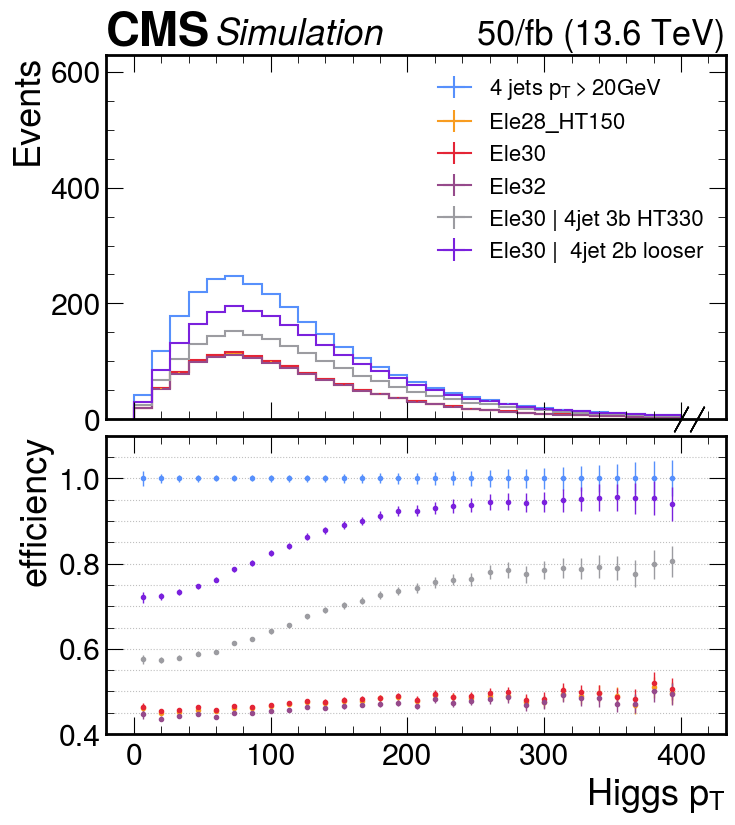

In [96]:
hist_comparison_2(df["variables"]["higgs_pt"]["ttHTobb"]["ttHTobb_Run3_Run3"], 
                ['semilep', 'semilep_Ele28','semilep_Ele30', 
                 'semilep_Ele32',"semilep_tripleB_Ele30", "semilep_doubleB_looser_Ele30"],
                 labels=["4 jets $p_T > 20 $GeV", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 |  4jet 2b looser"],
                  file="semilep_higgs_pt", 
                  yratio_lim=[0.4,1.1],
                 output_folder=f"{results_dir}/plots")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


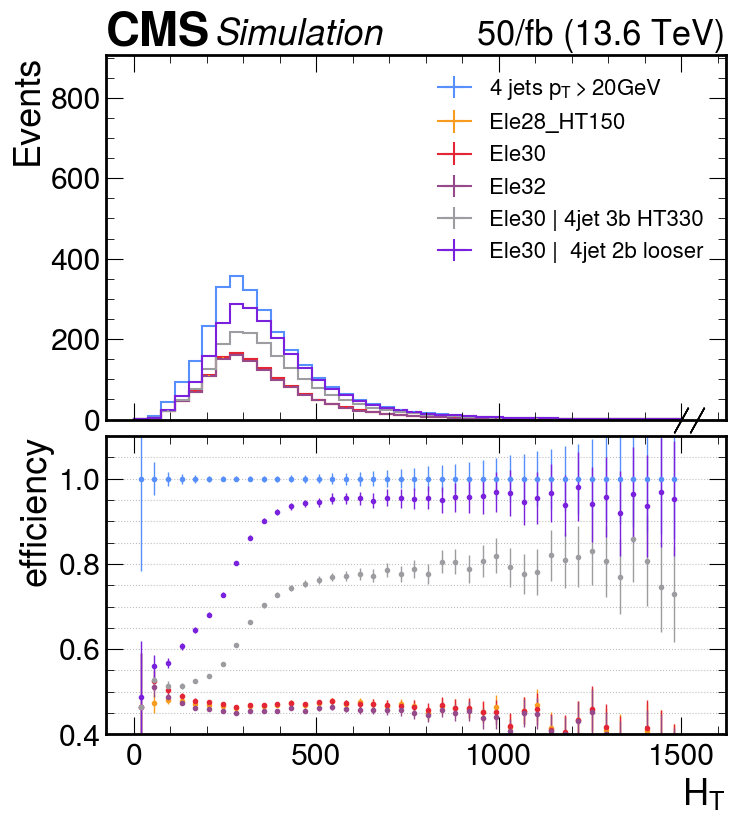

In [97]:
hist_comparison_2(df["variables"]["HT"]["ttHTobb"]["ttHTobb_Run3_Run3"], 
                ['semilep', 'semilep_Ele28','semilep_Ele30', 
                 'semilep_Ele32',"semilep_tripleB_Ele30", "semilep_doubleB_looser_Ele30"],
                 labels=["4 jets $p_T > 20 $GeV", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 |  4jet 2b looser"],
                  file="semilep_HT", 
                  yratio_lim=[0.4,1.1],
                 output_folder=f"{results_dir}/plots")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


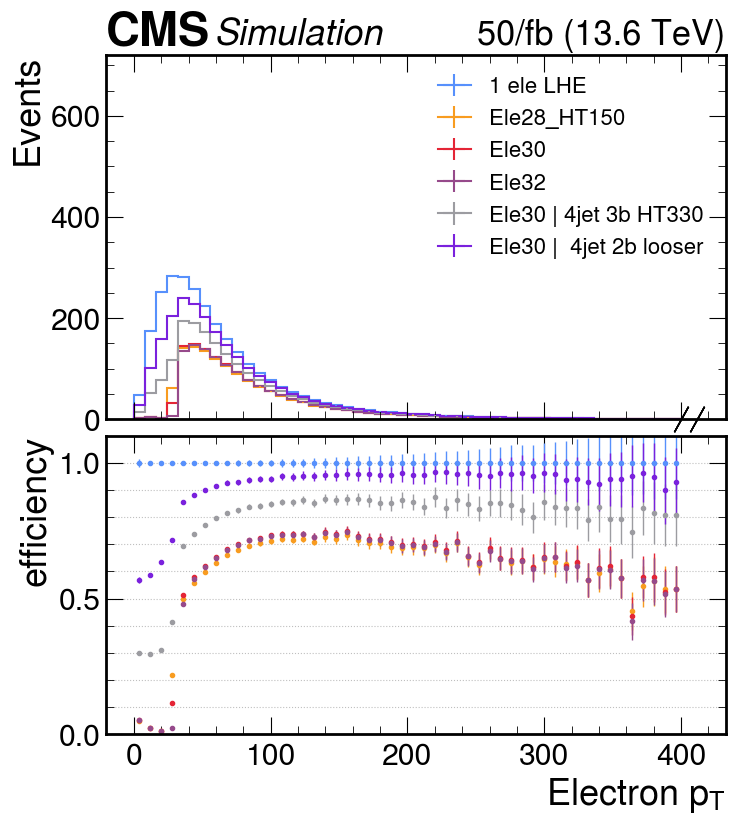

In [98]:
hist_comparison_2(df["variables"]["Electron_pt"]["ttHTobb"]["ttHTobb_Run3_Run3"], 
                ['semilep', 'semilep_Ele28','semilep_Ele30', 
                 'semilep_Ele32',"semilep_tripleB_Ele30", "semilep_doubleB_looser_Ele30"],
                 labels=["1 ele LHE", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 |  4jet 2b looser"],
                  file="semilep_Electron_pt", 
                  yratio_lim=[0.0,1.1],
                 output_folder=f"{results_dir}/plots")

/tmp/dvalsecc/ipykernel_1712096/244087147.py:36: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_1712096/244087147.py:36: RuntimeWarning: invalid value encountered in multiply
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_1712096/244087147.py:36: RuntimeWarning: invalid value encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_1712096/244087147.py:37: RuntimeWarning: invalid value encountered in true_divide
  r = np.where(nomvalues>0,h.values() / nomvalues, 1.0)
/tmp/dvalsecc/ipykernel_1712096/244087147.py:36: RuntimeWarning: divide by zero encountered in true_divide
  err = np.sqrt((1/nomvalues)**2 * h_sig2 + (h_val/nomvalues**2)**2 * nom_sig2 )
/tmp/dvalsecc/ipykernel_1712096/244087147.py:36: RuntimeWarning: invalid value encountered 

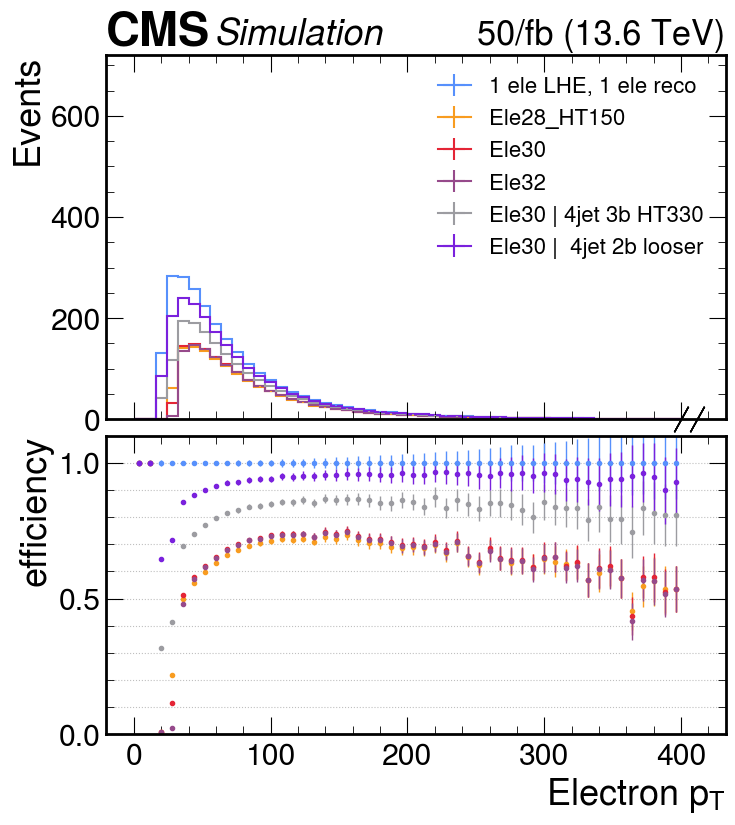

In [99]:
hist_comparison_2(df["variables"]["Electron_pt"]["ttHTobb"]["ttHTobb_Run3_Run3"], 
                ['semilep_recoele20', 'semilep_recoele20_Ele28','semilep_recoele20_Ele30', 
                 'semilep_recoele20_Ele32',"semilep_recoele20_tripleB_Ele30", 
                 "semilep_recoele20_doubleB_looser_Ele30"],
                 labels=["1 ele LHE, 1 ele reco", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 |  4jet 2b looser"],
                  file="semilep_Electron_pt_reco20ele", 
                  yratio_lim=[0.0,1.1],
                 output_folder=f"{results_dir}/plots")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


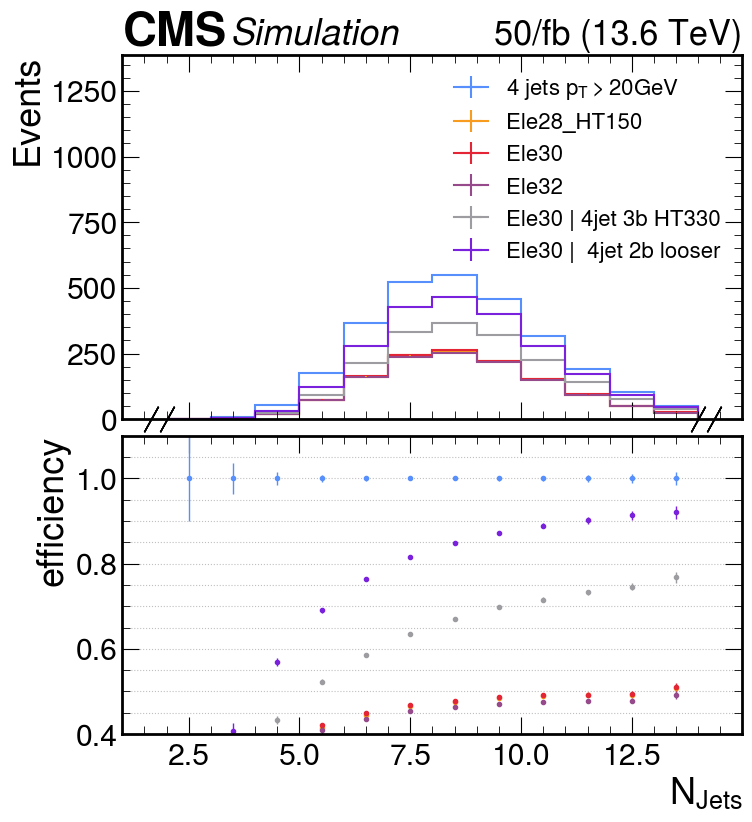

In [100]:
hist_comparison_2(df["variables"]["nJets"]["ttHTobb"]["ttHTobb_Run3_Run3"], 
                ['semilep', 'semilep_Ele28','semilep_Ele30', 
                 'semilep_Ele32',"semilep_tripleB_Ele30", "semilep_doubleB_looser_Ele30"],
                 labels=["4 jets $p_T > 20 $GeV", "Ele28_HT150", "Ele30", "Ele32",
                        "Ele30 | 4jet 3b HT330", "Ele30 |  4jet 2b looser"],
                  file="semilep_nJets", 
                  yratio_lim=[0.4,1.1],
                 output_folder=f"{results_dir}/plots")